In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from torch.nn import AvgPool1d
from torch import tensor
import matplotlib

### Plot subset of F1-curves

In [6]:
selection_dict = {'hp_idx':list(range(1000))}

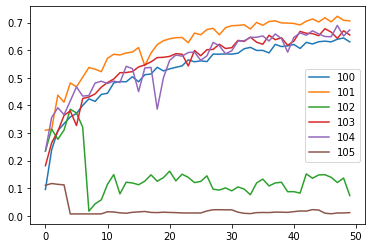

In [8]:
hp_grid_df = pd.read_csv('hp_grid_p3.csv')
#do subsetting
for col,values in selection_dict.items():
    hp_grid_df = hp_grid_df[hp_grid_df[col].isin(values)]
hp_idxs = hp_grid_df.hp_idx.tolist()
for hp_idx in hp_idxs:
    if (hp_idx > 99) & (hp_idx < 106):
        f1_df = pd.read_csv('ISI_hp{}_f1s.csv'.format(str(hp_idx)))
        plt.plot(range(len(f1_df)),f1_df.train_acc,label=hp_idx)
        plt.legend()

In [ ]:
#Note, best are 3 and 4 (800 bins) 

TypeError: savefig() missing 1 required positional argument: 'fname'

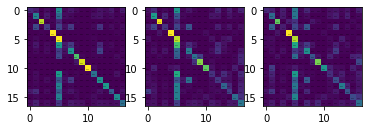

In [28]:
hp_grid_df = pd.read_csv('hp_grid.csv')
#do subsetting
for col,values in selection_dict.items():
    hp_grid_df = hp_grid_df[hp_grid_df[col].isin(values)]
hp_idxs = hp_grid_df.hp_idx.tolist()

for hp_idx in hp_idxs:
    fig, ax = plt.subplots(1,3)
    cm_arr = np.load('ISI_hp{}_cms.npy'.format(str(hp_idx)))
    ax[0].imshow(cm_arr[:,:,0])
    ax[1].imshow(cm_arr[:,:,1])
    ax[2].imshow(cm_arr[:,:,2])
    for y in range(cm_arr.shape[0]):
        for x in range(cm_arr.shape[1]):
            ax[0].text(x, y, '%.4f' % cm_arr[y, x, 0],
                     horizontalalignment='center',
                     verticalalignment='center',
                        fontsize='1',
                 )
            ax[1].text(x, y, '%.4f' % cm_arr[y, x, 1],
                     horizontalalignment='center',
                     verticalalignment='center',
                       fontsize='1'
                 )
            ax[2].text(x, y, '%.4f' % cm_arr[y, x, 2],
                     horizontalalignment='center',
                     verticalalignment='center',
                       fontsize='1'
                 )
            ax[0].xticks(ticks=range(cm_arr.shape[1]),labels=None)
            ax[1].xticks()
            ax[2].xticks()
    plt.savefig()

In [15]:
from torch.nn import AvgPool1d
from torch import tensor
import numpy as np

def add_random_noise(x, sigma=0.1):
    noisy_x = []
    for hist in x:
        hist = list(hist)
        noisy_hist = np.asarray([xi*np.random.normal(1,sigma) for xi in hist])
        noisy_x.append(noisy_hist)
    return noisy_x

def moving_average(x, kernel_width=3,padding=1):
    averaged_x = []
    m = AvgPool1d(kernel_width,1,padding,count_include_pad=False)
    for hist in x:
        hist = list(hist)
        averaged_hist = m(tensor([[hist]])).numpy()[0,0,:]
        averaged_x.append(averaged_hist)
    return averaged_x
        
    

In [16]:
x = [np.asarray([(np.random.randint(0,1000)/1000) for val in range(10)]) for xi in range(10)]
#add_random_noise(x)
moving_average(x)

[0.686, 0.494, 0.831, 0.903, 0.149, 0.195, 0.027, 0.952, 0.207, 0.738] [0.59       0.67033333 0.74266667 0.62766667 0.41566667 0.12366667
 0.39133333 0.39533333 0.63233333 0.4725    ]
[0.533, 0.624, 0.709, 0.165, 0.283, 0.114, 0.672, 0.146, 0.786, 0.785] [0.5785     0.622      0.49933333 0.38566667 0.18733333 0.35633333
 0.31066667 0.53466667 0.57233333 0.7855    ]
[0.189, 0.461, 0.817, 0.456, 0.197, 0.825, 0.631, 0.18, 0.376, 0.508] [0.325      0.489      0.578      0.49       0.49266667 0.551
 0.54533333 0.39566667 0.35466667 0.442     ]
[0.731, 0.286, 0.706, 0.126, 0.962, 0.654, 0.235, 0.697, 0.913, 0.001] [0.5085     0.57433333 0.37266667 0.598      0.58066667 0.617
 0.52866667 0.615      0.537      0.457     ]
[0.646, 0.144, 0.133, 0.165, 0.947, 0.948, 0.445, 0.633, 0.489, 0.815] [0.395      0.30766667 0.14733333 0.415      0.68666667 0.78
 0.67533333 0.52233333 0.64566667 0.652     ]
[0.042, 0.869, 0.875, 0.765, 0.958, 0.865, 0.82, 0.312, 0.629, 0.562] [0.4555     0.59533333 0.83